### 다중 회귀 - 보스톤 주택 가격

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()

In [17]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target # price 맞나 확인 
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


- 산점도와 선형회귀선 : seaborn.regplot()

In [11]:
features = df.columns[1:-1]               # ZN ~ LSTAT 12개 
print(features)

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


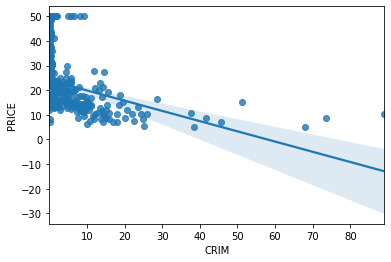

In [14]:
sns.regplot(x='CRIM', y ='PRICE', data =df)
plt.show()

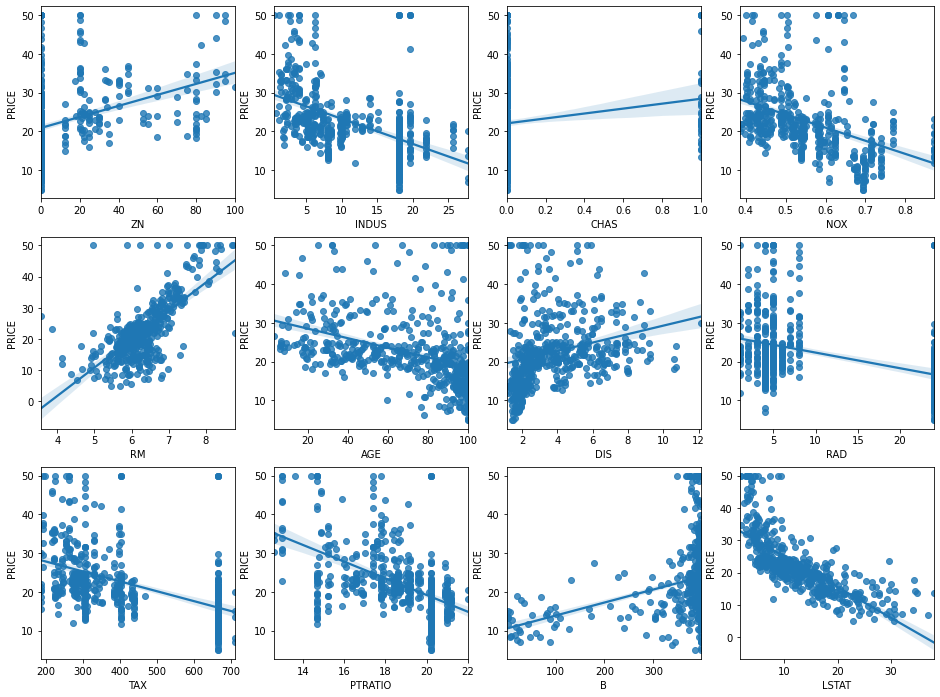

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate (features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y ='PRICE', data=df, ax = axs[row][col]) # 4번 23분경 못 들음 

In [18]:
# RM, LSTAT 상관관계 높아보임 
# 회귀선에 몰려있는 모습 
# 실제로도 그런지.. 

- 어떤 feature가 가격과 상관관계가 높을까? 

In [20]:
from sklearn.linear_model import LinearRegression

In [78]:
# 'CRIM'
y = boston.target 
X = boston.data[:,0].reshape(-1,1)  # or boston.data[:, 0:1] - reshape필요없음 
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)


0.15078046904975717

In [27]:
# 'CRIM'
y = boston.target 
X = df['CRIM'].values.reshape(-1,1)  # or boston.data[:, 0:1] - reshape필요없음 
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.15078046904975717

- 전체 data에 대해 score 구하기

In [46]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [54]:
for feature in boston.feature_names:
    print(feature)                    # 문자열! 

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [56]:
y = boston.target
for feature in boston.feature_names:
    X = df[feature].values.reshape(-1,1)      # df['feature'] : feature는 이미 문자열,'' 필요X, i는 되도록 정수일때만
    lr = LinearRegression()
    lr.fit(X, y)
    print(lr.score(X, y))                       # 왜 return이 아닐까? print/ return 

    


0.15078046904975717
0.12992084489428946
0.2339900304444752
0.03071612970877491
0.182603042501699
0.48352545599133423
0.14209474407780442
0.062464372121782574
0.14563857991232532
0.2195259210442193
0.257847318009223
0.11119611824636277
0.5441462975864799


In [57]:
y = boston.target
for feature in boston.feature_names:
    X = df[feature].values.reshape(-1,1)     
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- 다중 선형회귀

In [60]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X,y)         # Done

LinearRegression()

In [61]:
#  다중 선형회귀에서는 큰 의미 없음 
lr.score(X, y)

0.7406426641094095

In [62]:
# Weight 
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [63]:
# Bias
lr.intercept_

36.459488385089855

- 회귀식
<pre>
PRICE = -0.108*CRIM + 0.046*ZM + 0.021*INDUS + 2.69*CHAS - 0.178*NOX +3.81*RM 
        + 0.00069*AGE - 1.48*DIS + 0.306*RAD - 0.012*TAX - 0.95*PRATIO + 0.00931*B - 0.525*LSTAT 
        + 36.46
</pre>

- 테스트 데이터

In [64]:
boston.data[0]      # 첫번째 행 

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [66]:
# 기울기와 절편을 이용한 예측값
np.dot(lr.coef_, boston.data[0])  + lr.intercept_            # dot product? 

30.003843377016814

In [67]:
# 실제값 
boston.target[0]

24.0

In [68]:
# 5개 데이터에 대한 예측값 및 실제값 

for i in range(5):
    pred = np.dot(lr.coef_, boston.data[i]) + lr.intercept_
    print(f'예측값 : {pred:.2f} 실제값 : {boston.target[i]}')

예측값 : 30.00 실제값 : 24.0
예측값 : 25.03 실제값 : 21.6
예측값 : 30.57 실제값 : 34.7
예측값 : 28.61 실제값 : 33.4
예측값 : 27.94 실제값 : 36.2


In [70]:
lr.predict(boston.data[:5])     # 예측값 : dot(lr.coef_, boston.data[i])  + lr.intercept_ 내부적인 구성은 이렇습니다. (회귀식 구성과 똑같음)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [71]:
lr.predict(boston.data[0])  # 1차원이라 에러남 한 행만은 이렇게 할 수 X 

ValueError: Expected 2D array, got 1D array instead:
array=[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [75]:
# 데이터가 여러 개일때 
lr.predict(boston.data[:5])  

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [76]:
# 데이터가 한 개 일때 
lr.predict(boston.data[0:1]), lr.predict(boston.data[0].reshape(1,-1))      # 둘 같음

(array([30.00384338]), array([30.00384338]))